# Lab 4

## 1)

### 1)

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import RocCurveDisplay 
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold   
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve 
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_gaussian_quantiles

In [139]:

df = pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 4/iris1 (1).csv')

Lable_en=LabelEncoder()
df['Y1']=Lable_en.fit_transform(df['Y1'])

df1=df.drop(columns=['Y1'],axis=1)

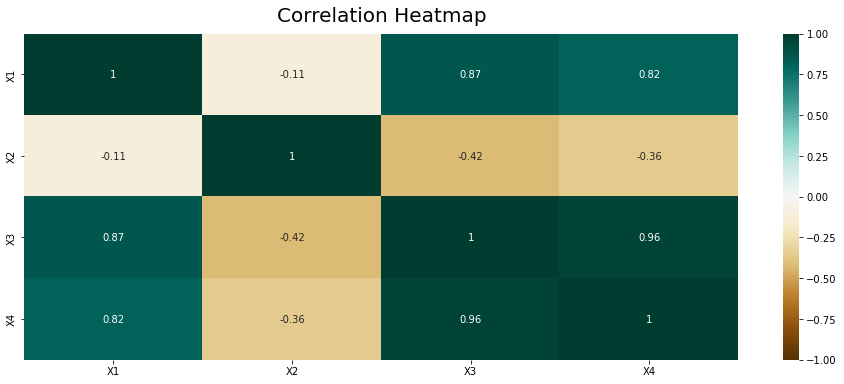

In [140]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

There is a very strong correlation between X1 and X3 , X1 and X4 and X3 and X4. I am removing X3 and X4 columns.

In [141]:
df=df.drop(columns=['X3','X4'],axis = 1 )
df.dtypes

X1    float64
X2    float64
Y1      int64
dtype: object

In [106]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3)

In [107]:
df1 = X_train.copy()
df1['Y']= y_train

df2 = X_test.copy()
df2['Y']= y_test

### 2)

In [144]:
class Gaussian_NBC:
  
  def __init__(self,var):
    self.var = var
    self.Cov_Mat = []
    self.Mean_Mat = []
    self.Prior_prob = []

  def Train(self,X_train,y_train):
    if self.var!=3:
      if 'y_train' in X_train.columns:
        X_train = X_train.drop(columns=['y_train'],axis = 1)
    M = np.array(X_train.cov())
    X_train['y_train']=y_train
    
    for i in range(len(y_train.unique())):
      class_x = X_train[X_train[X_train.columns[-1:][0]] == i]
      
      u_mat=[]
      for j in class_x.columns:
        if( j!= class_x.columns[-1:][0]):
          u_mat.append(np.mean(class_x[j]))
      self.Mean_Mat.append(u_mat)

      self.Prior_prob.append(len(class_x)/len(y_train))
      class_x = class_x.iloc[:,:-1]

      len_x = len(class_x.columns)

      if(self.var == 1):
        
        self.Cov_Mat.append(np.identity(len_x))

      elif(self.var == 2):
        
        self.Cov_Mat.append(M)

      elif(self.var == 3):
        
        Mx = np.array(class_x.cov())
        self.Cov_Mat.append(Mx)


  def g(self,x,y):
    # print(x,self.Mean_Mat[y])
    x_minus_u = np.subtract(x,self.Mean_Mat[y])
    x_minus_u_transpose = np.transpose(x_minus_u)
    Mx_inv = np.linalg.inv(self.Cov_Mat[y])
    P_x=self.Prior_prob[y]
    det_Mx = np.linalg.det(self.Cov_Mat[y])

    calc = -0.5*np.matmul(np.dot(x_minus_u,Mx_inv),x_minus_u_transpose) + np.log(P_x) - 0.5*np.log(abs(det_Mx))
  
    return calc

  def Predict(self,x):
    l=[]
    for i in range(len(self.Prior_prob)):
      l.append(self.g(x,i))
    
    return l.index(max(l))

  def predict_array(self,X_test):
    X_test=pd.DataFrame(X_test)
    l_pred=[]
    X_test.index = [i for i in range(len(X_test))]
    for i in range(len(X_test)):
      x = np.array(X_test.iloc[i:i+1,:len(X_test.columns)])
      l_pred.append(self.Predict(x))
    return l_pred

  def Test(self,X_test,y_test):
    pred = self.predict_array(X_test)
    self.accuracy = acc(y_test,pred)  

  def plot_decision_boundary(self,X_test,y_test,X_train,y_train):
    x_min, x_max = X_test.iloc[:,0].min() - 1, X_test.iloc[:,0].max() + 1
    y_min, y_max = X_test.iloc[:,1].min() - 1, X_test.iloc[:,1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = self.predict_array(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap='inferno', alpha=0.8)
    plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, s=40, cmap='inferno',marker = 'x')
    plt.title("Decision Boundary of GaussianNB Variant "+str(self.var))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()   

   

### 3)

Accuracy of Variant 3 is : 0.8


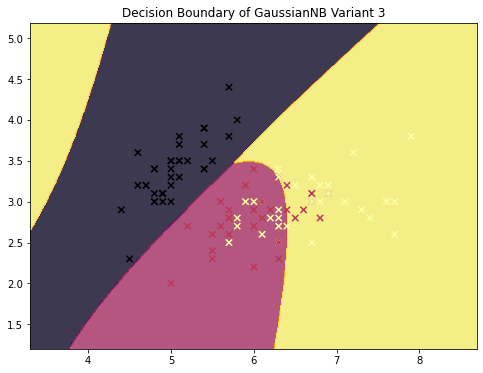

In [109]:
clf = Gaussian_NBC(3)
clf.Train(X_train,y_train)
clf.Test(X_test,y_test)
print("Accuracy of Variant "+str(clf.var)+" is :",clf.accuracy)
clf.plot_decision_boundary(X_test,y_test,X_train,y_train)  

Accuracy of Variant 2 is : 0.8222222222222222


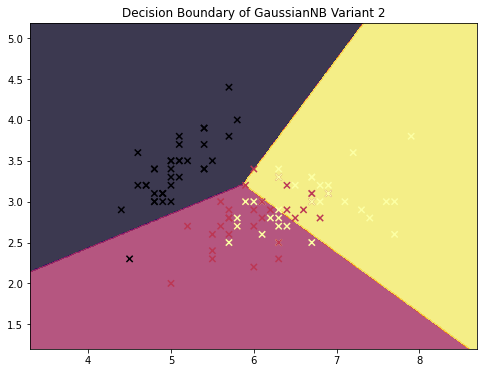

In [110]:
clf = Gaussian_NBC(2)
clf.Train(X_train,y_train)
clf.Test(X_test,y_test)
print("Accuracy of Variant "+str(clf.var)+" is :",clf.accuracy)
clf.plot_decision_boundary(X_test,y_test,X_train,y_train)

Accuracy of Variant 1 is : 0.7777777777777778


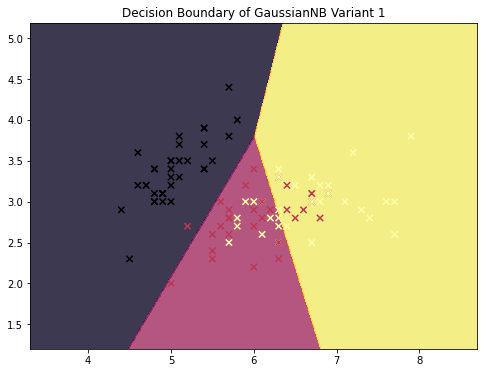

In [111]:
clf = Gaussian_NBC(1)
clf.Train(X_train,y_train)
clf.Test(X_test,y_test)
print("Accuracy of Variant "+str(clf.var)+" is :",clf.accuracy)
clf.plot_decision_boundary(X_test,y_test,X_train,y_train)

### 4)

In [145]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] 
 
k = 5
kf = KFold(n_splits=k,shuffle = True) 
for m in range(1,4):
  accuracy = []
    
  for train_index , test_index in kf.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
      GNB = Gaussian_NBC(m)
      GNB.Train(X_train,y_train)
      GNB.Test(X_test,y_test)
      accuracy.append(GNB.accuracy)

  avg_acc = sum(accuracy)/k
  max_acc=max(accuracy)

  print('Array of accuracies for variant '+str(m)+' : ')
  print(accuracy)

  print('Average ACC overall :')
  print(avg_acc)
  print('Variation in Accuracy :')
  print(np.var(accuracy))
  print('Maximum ACC overall :')
  print(max_acc)

<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train
<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train
<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Array of accuracies for variant 1 : 
[0.8666666666666667, 0.7666666666666667, 0.8666666666666667, 0.7, 0.7333333333333333]
Average ACC overall :
0.7866666666666667
Variation in Accuracy :
0.0047111111111111156
Maximum ACC overall :
0.8666666666666667


<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train
<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train
<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Array of accuracies for variant 2 : 
[0.7, 0.8333333333333334, 0.8333333333333334, 0.8, 0.7666666666666667]
Average ACC overall :
0.7866666666666667
Variation in Accuracy :
0.0024888888888888916
Maximum ACC overall :
0.8333333333333334


<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train
<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train
<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Array of accuracies for variant 3 : 
[0.8333333333333334, 0.6333333333333333, 0.7666666666666667, 0.8666666666666667, 0.7333333333333333]
Average ACC overall :
0.7666666666666667
Variation in Accuracy :
0.0066666666666666706
Maximum ACC overall :
0.8666666666666667


<ipython-input-144-0b71a1d8122a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train']=y_train


### 5)

In [113]:
import numpy as np
from math import sqrt

# Create data
data = (np.random.rand(500, 2) * 10) - 5

In [114]:
# Create class labels
labels = np.zeros(500)
for i in range(500):
    dist = sqrt(data[i,0]**2 + data[i,1]**2)
    if dist <= 3:
        labels[i] = 1
    elif dist > 3 and dist <= 5:
        labels[i] = 2

# Print data and labels
# print(data)
# print(labels)

df3 = pd.DataFrame(data)
df3['Y']=labels
df3.rename(columns = {0:'X1', 1:'X2'}, inplace = True)
df3

,X1,X2,Y
0,4.794602,-2.385924,0.0
1,3.535302,3.852574,0.0
2,-0.083225,0.082848,1.0
3,-2.840224,-2.276589,2.0
4,-4.074542,-4.193794,0.0
...,...,...,...
495,0.857257,1.194102,1.0
496,2.215835,2.688616,2.0
497,-2.392841,-3.977111,2.0
498,4.173308,2.860354,0.0


In [115]:
df3_1 = df3[df3['Y'] == 1.0] 

df3_2 = df3[df3['Y'] == 2.0]

df3 = pd.concat([df3_1,df3_2])
df3

,X1,X2,Y
2,-0.083225,0.082848,1.0
6,0.058393,2.582690,1.0
21,-0.320812,-1.704151,1.0
23,-0.270100,-2.175503,1.0
25,-2.771571,0.276386,1.0
...,...,...,...
489,2.947565,-1.742612,2.0
494,-1.901533,2.977219,2.0
496,2.215835,2.688616,2.0
497,-2.392841,-3.977111,2.0


In [116]:
print(df3['Y'].unique())
X1 = df3.iloc[:,:-1]
y1 = df3.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = tts(X1, y1, test_size=0.3)

[1. 2.]


In [117]:
clf1 = Gaussian_NBC(3)
clf1.Train(X_train1,y_train1)
clf1.Test(X_test1,y_test1)
print(clf.accuracy)

0.7777777777777778


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9524: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
<ipython-input-108-e8a93004aaa2>:52: RuntimeWarning: divide by zero encountered in log

/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
<ipython-input-108-e8a93004aaa2>:52: RuntimeWarning: divide by zero encountered in log
  calc = -0.5*np.matmul(np.dot(x_minus_u,Mx_inv),x_minus_u_transpose) + np.log(P_x) - 0.5*np.log(abs(det_Mx))


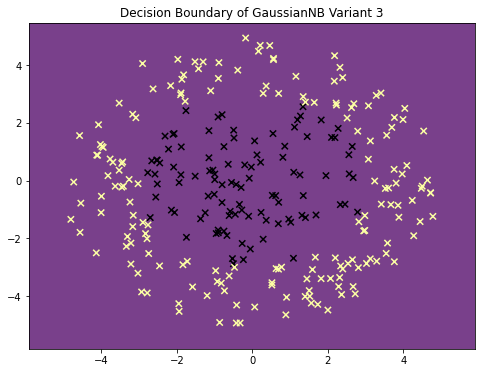

In [118]:
clf1.plot_decision_boundary(X_test1,y_test1,X_train1,y_train1)

## 2)

### 1)

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [120]:
mean=np.array([0,0])
cov = np.array([[3/2,1/2],[1/2,3/2]])
print(mean)
print(cov)

[0 0]
[[1.5 0.5]
 [0.5 1.5]]


In [121]:
X1 = np.random.multivariate_normal(mean,cov,250)
# print(X)
X=X1.transpose()
# print(X[0])

In [122]:
def cov_s(l0,l1):
  u0=np.mean(l0)
  u1=np.mean(l1)
  sum=0
  for i in range(len(l0)):
    sum += (l0[i]-u0)*(l1[i]-u1)
  cov_a = sum/(len(l0)-1)
  return cov_a

In [123]:
a1 =  cov_s(X[0],X[0])
a2 = cov_s(X[0],X[1])
a3 = cov_s(X[1],X[0])
a4 = cov_s(X[1],X[1])

covariance_matrix=np.array([[a1,a2],[a3,a4]])

print(covariance_matrix)

[[1.50514181 0.4241603 ]
 [0.4241603  1.240693  ]]


In [124]:
eig_v , eig_vec = np.linalg.eig(covariance_matrix)

print("eigen value = ",eig_v)
print("eigen vector = ",eig_vec)



eigen value =  [1.81720926 0.92862555]
eigen vector =  [[ 0.80548342 -0.59261831]
 [ 0.59261831  0.80548342]]


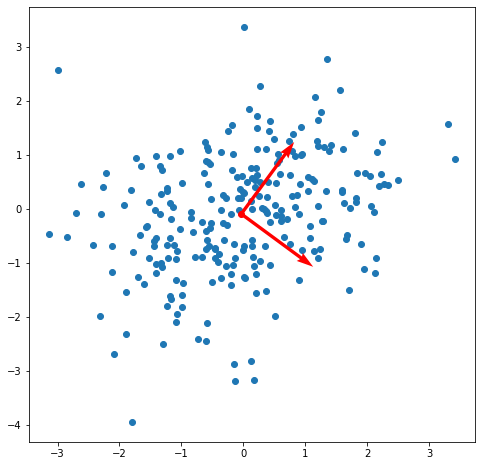

In [125]:
plt.figure(figsize=(8,8))
plt.scatter(X[0],X[1])
u0=np.mean(X[0])
u1=np.mean(X[1])
plt.scatter(u0,u1,c='r')
# eig_vec.transpose()
ax = plt.gca()
ax.quiver(u0, u1, eig_vec[0][0], eig_vec[0][1],color=['r','b'],scale=5)
ax.quiver(u0, u1, eig_vec[1][0], eig_vec[1][1],color=['r','b'],scale=5)


### 2)

In [126]:
from scipy.linalg import fractional_matrix_power

Y=X1.dot(fractional_matrix_power(covariance_matrix,-0.5))

Y1=Y.transpose()

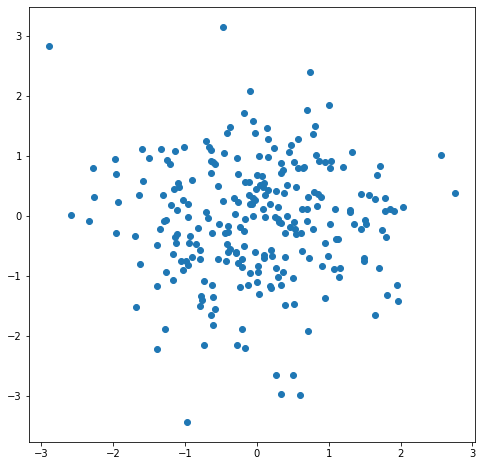

In [127]:
plt.figure(figsize=(8,8))
plt.scatter(Y1[0],Y1[1])

In [128]:
b1 =  cov_s(Y1[0],Y1[0])
b2 = cov_s(Y1[0],Y1[1])
b3 = cov_s(Y1[1],Y1[0])
b4 = cov_s(Y1[1],Y1[1])

covariance_matrix_y=np.array([[b1,b2],[b3,b4]])

print(covariance_matrix_y)

[[ 1.00000000e+00 -1.26516379e-16]
 [-1.26516379e-16  1.00000000e+00]]


## 3)

In [129]:
import numpy as np 


theta = np.linspace(0,2*np.pi, 11) 


x = 5*np.cos(theta)
y = 5*np.sin(theta)

circle_p=[]

for i in range(11): 
    circle_p.append([x[i],y[i]])

circle_p=np.array(circle_p)
P=circle_p.transpose()

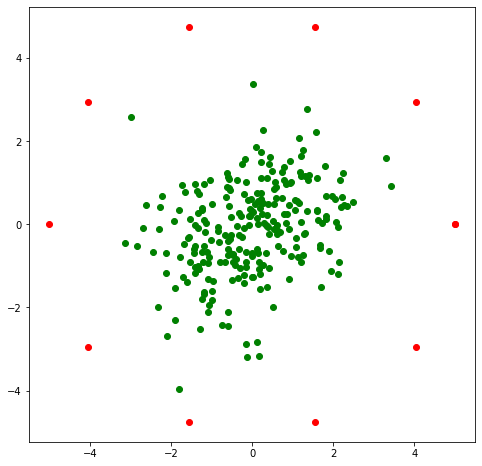

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(X[0],X[1],c='g')
plt.scatter(P[0],P[1],c='r')
plt.show()

In [131]:
Cir_p_ec_dist=[]
point1=np.array([0,0]) # mean of given dataset
for i in range(11):
  dist = np.linalg.norm(point1 - circle_p[i])
  Cir_p_ec_dist.append(dist)


Text(0.5, 1.0, 'Euclidian Distance Before Transformation')

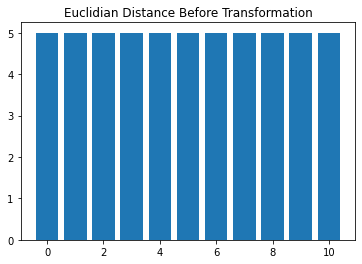

In [132]:
x=[]
for i in range(0,11):
  x.append(i)

plt.bar(x,Cir_p_ec_dist) 
plt.title("Euclidian Distance Before Transformation")   

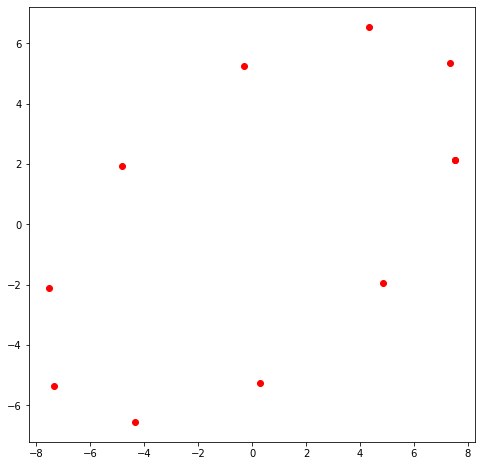

In [133]:
plt.figure(figsize=(8,8))
Q = np.dot(covariance_matrix,P)
Q1=Q.transpose()
plt.scatter(Q[0],Q[1],c='r')

In [134]:
Q_dist=[]
point1=np.array([0,0]) # mean of given dataset
for i in range(11):
  dist = np.linalg.norm(point1 - Q1[i])
  Q_dist.append(dist)

Text(0.5, 1.0, 'Euclidian Distance After Transformation')

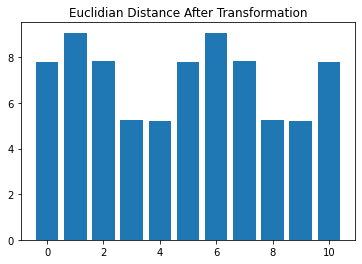

In [135]:
plt.bar(x,Q_dist)
plt.title("Euclidian Distance After Transformation")  

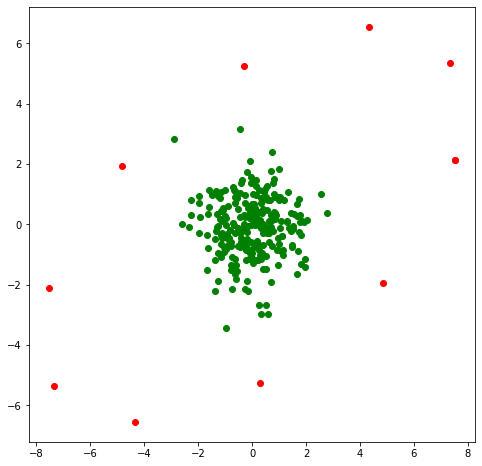

In [136]:
plt.figure(figsize=(8,8))
plt.scatter(Y1[0],Y1[1],c='g')
plt.scatter(Q[0],Q[1],c='r')
plt.show()